Step-by-Step Guide:
1. Load the dataset.
2. Explore the data.
3. Prepare the data like handle missing value, etc.
4. Split the dataset into train and test sets.
5. Train the Linear Regression models.
6. Do an evaluation.
7. Visualize it !

### <b>1. Load the Dataset

In [52]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [53]:
# We use boston dataset
df = pd.read_csv('boston.csv')

In [54]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### <b>2. Explore the Data

In [55]:
# looking for statistics of the dataset
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [56]:
# check for missing values
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

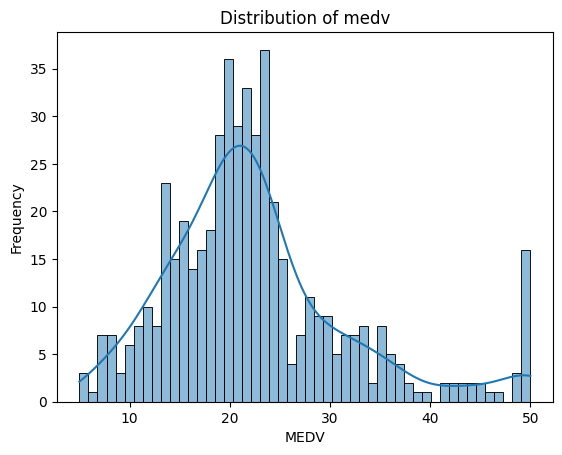

In [57]:
# Visualize the distribution of the target variable
sns.histplot(df['medv'], bins=50, kde=True)
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.title('Distribution of medv')
plt.show()

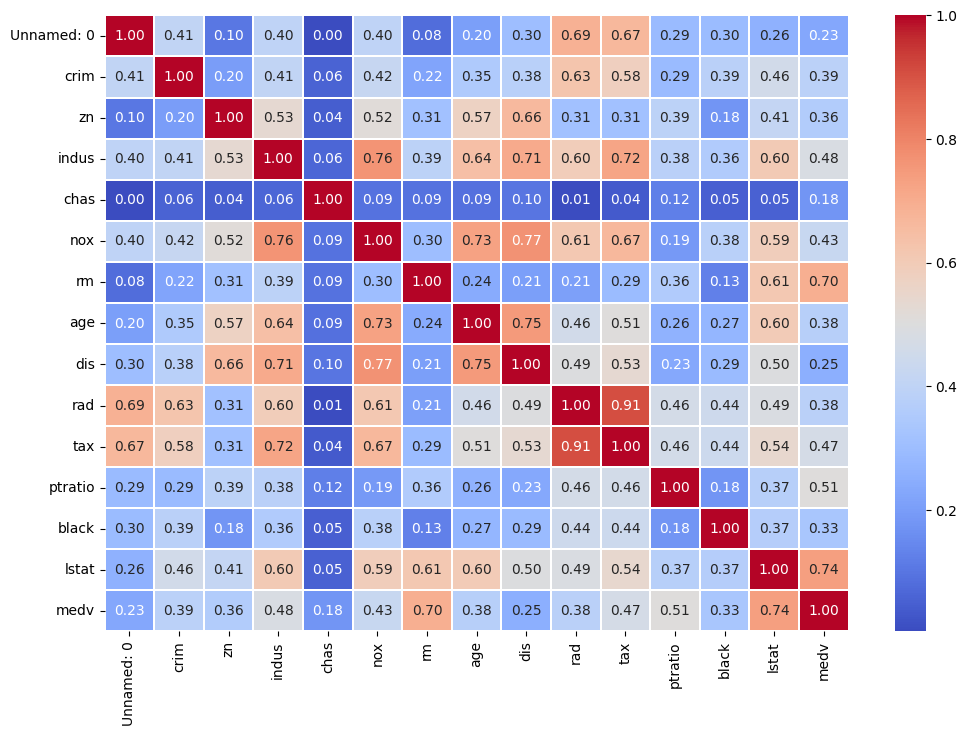

In [58]:
# Visualize the correlation between the features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr().abs(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1, linecolor='white', cbar=True)
plt.show()

### <b>3. Data Preparation

<p> since there's no missing values in our Boston dataset, so we don't have to do any of data engineering to handle it. Let's do the Splitting data step !

### <b>4. Split the Dataset

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
# Dene the features and target variable
X = df.drop('medv', axis=1)
y = df['medv']

In [61]:
X.head() # the features

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [62]:
y.head() # the target

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [63]:
# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### <b>5. Train the Linear Regression Models

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

### <b>6. Evaluate Your Models !

In [68]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Train R2: {train_r2:.2f}')
print(f'Test R2: {test_r2:.2f}')

Train MSE: 21.53
Test MSE: 24.50
Train R2: 0.75
Test R2: 0.67


### <b>7. Then Visualize the Result

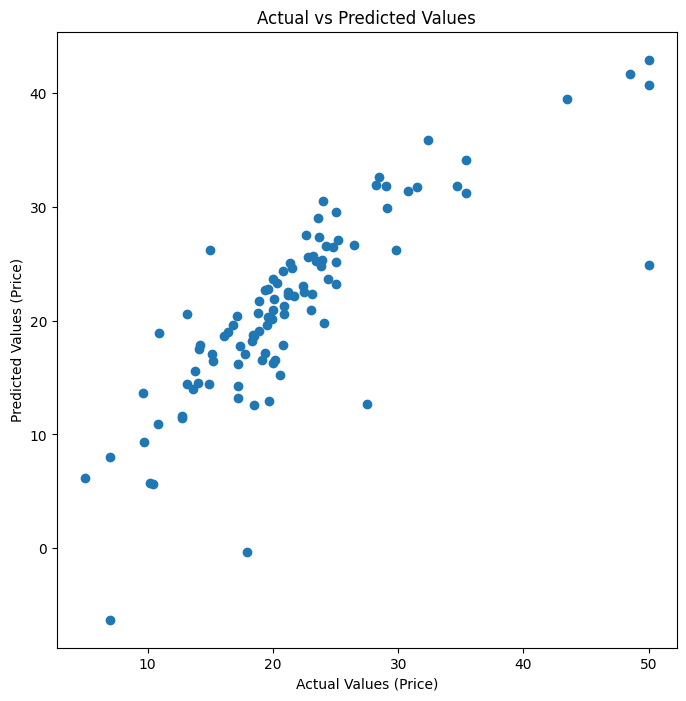

In [81]:
# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values (Price)')
plt.ylabel('Predicted Values (Price)')
plt.title('Actual vs Predicted Values')
plt.show()

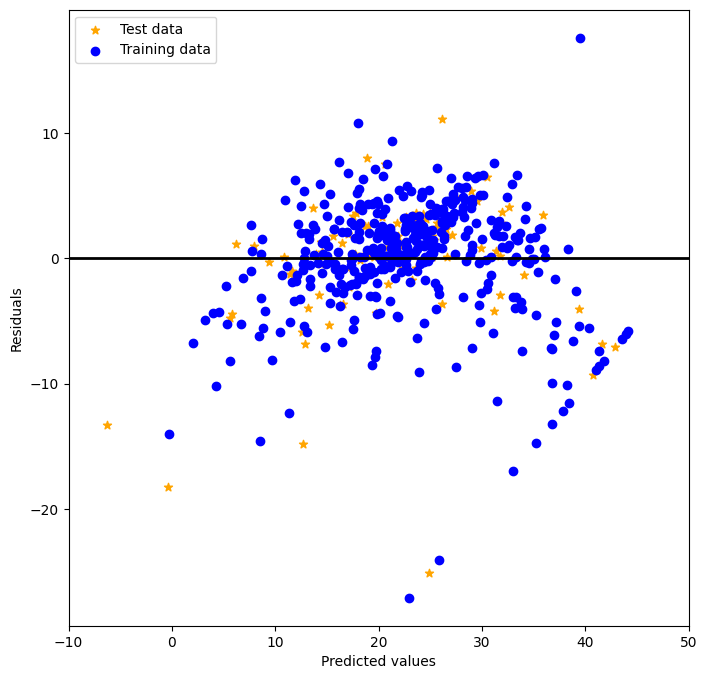

In [80]:
# Plot the residuals
plt.figure(figsize=(8, 8))
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

<h1>Purpose of the Residual Plot</h1>
<p>The residual plot is a diagnostic tool that used to assess the fit of our Linear Regression Models. Here's what it shows:</p>
<ul>
    <li><strong>Residuals:</strong> The differences between the actual and predicted values. These should ideally be randomly distributed without any clear pattern.</li>
    <li><strong>Zero Residual Line:</strong> The horizontal line at <code>y=0</code> helps visualize how the residuals are distributed around zero. In a well-fitted model, residuals should be evenly spread around this line.</li>
    <li><strong>Training vs. Test Data:</strong> By plotting both training and test data, you can compare how the model performs on both sets. Ideally, the residuals for both should have similar distributions.</li>
</ul>